# Libraries

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

## Read dataset

In [2]:
df = pd.read_csv("diabetes(253k,22).csv")

# Data Exploration (EDA - Exploratory Data Analysis)

In [3]:
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,2,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [4]:
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1
253679,2,1,1,1,25,0,0,1,1,1,...,1,0,2,0,0,0,0,9,6,2


In [5]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Diabetes_012: 3 unique values
HighBP: 2 unique values
HighChol: 2 unique values
CholCheck: 2 unique values
BMI: 84 unique values
Smoker: 2 unique values
Stroke: 2 unique values
HeartDiseaseorAttack: 2 unique values
PhysActivity: 2 unique values
Fruits: 2 unique values
Veggies: 2 unique values
HvyAlcoholConsump: 2 unique values
AnyHealthcare: 2 unique values
NoDocbcCost: 2 unique values
GenHlth: 5 unique values
MentHlth: 31 unique values
PhysHlth: 31 unique values
DiffWalk: 2 unique values
Sex: 2 unique values
Age: 13 unique values
Education: 6 unique values
Income: 8 unique values


### missing values


In [6]:
print(f'missing values: \n{(df.isnull().sum()/df.shape[0])*100}' )

missing values: 
Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64


### Duplicated

In [7]:
print(f'duplicated: { df.duplicated().sum() }' )

duplicated: 23899


In [8]:
df = df.drop_duplicates()

In [9]:
print(f'Dublicated: {df.duplicated().sum()}')

Dublicated: 0


### Analyze Data Distribution & Summary

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          229781 non-null  int64
 1   HighBP                229781 non-null  int64
 2   HighChol              229781 non-null  int64
 3   CholCheck             229781 non-null  int64
 4   BMI                   229781 non-null  int64
 5   Smoker                229781 non-null  int64
 6   Stroke                229781 non-null  int64
 7   HeartDiseaseorAttack  229781 non-null  int64
 8   PhysActivity          229781 non-null  int64
 9   Fruits                229781 non-null  int64
 10  Veggies               229781 non-null  int64
 11  HvyAlcoholConsump     229781 non-null  int64
 12  AnyHealthcare         229781 non-null  int64
 13  NoDocbcCost           229781 non-null  int64
 14  GenHlth               229781 non-null  int64
 15  MentHlth              229781 non-null  

In [11]:
df.shape

(229781, 22)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


In [83]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

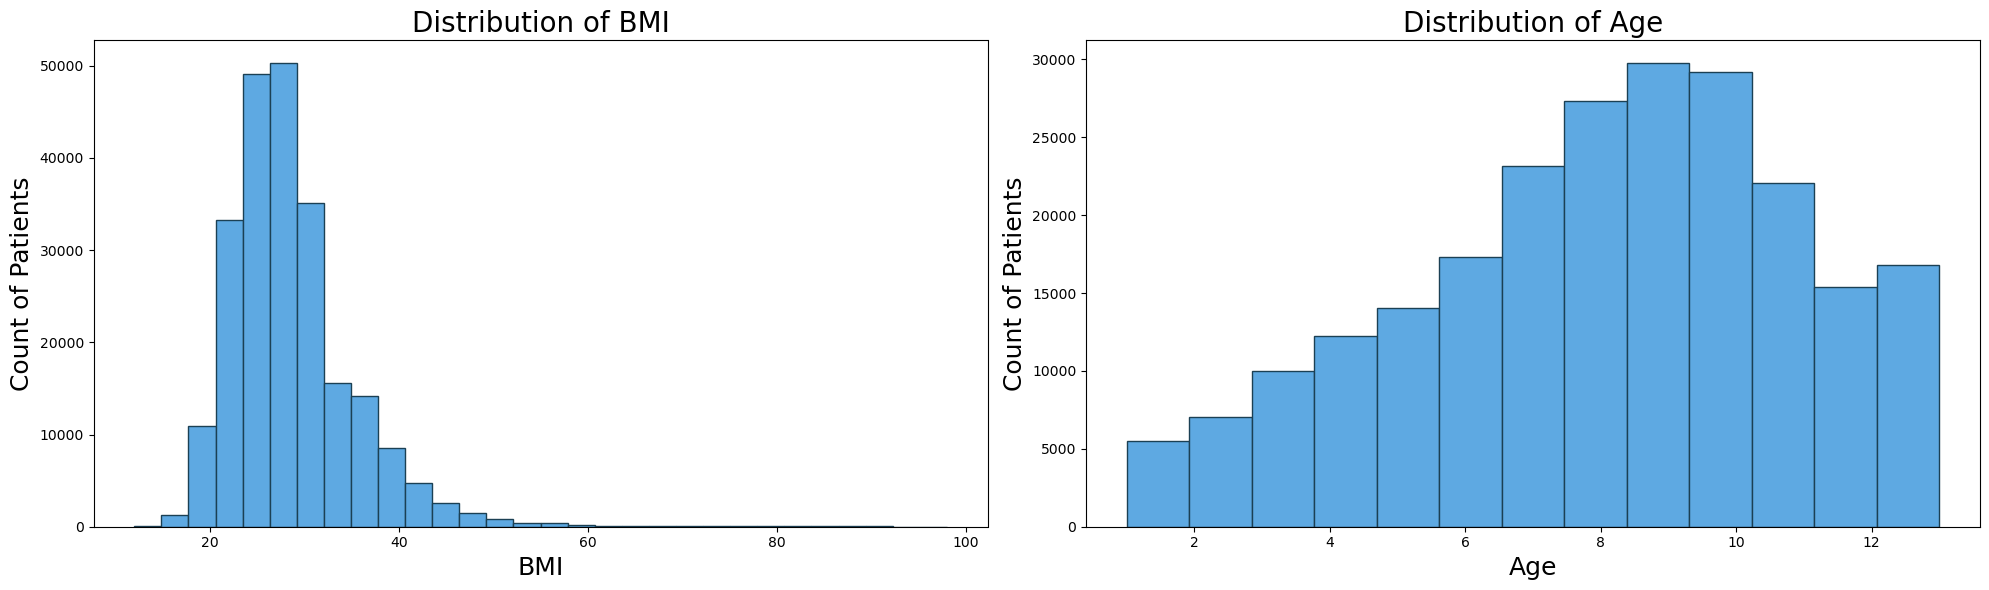

In [13]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1) 
plt.hist(df['BMI'], color="#5ea9e2", bins=30, edgecolor="#1b4054")
plt.xlabel("BMI", fontsize=18)
plt.ylabel("Count of Patients", fontsize=18)
plt.title("Distribution of BMI", fontsize=20)

plt.subplot(1, 2, 2) 
plt.hist(df['Age'], color="#5ea9e2", bins=13, edgecolor="#1b4054")
plt.xlabel("Age", fontsize=18)
plt.ylabel("Count of Patients", fontsize=18)
plt.title("Distribution of Age", fontsize=20)


plt.tight_layout()
plt.show()


In [14]:
df["Diabetes_012"].value_counts()

Diabetes_012
0    190055
2     35097
1      4629
Name: count, dtype: int64

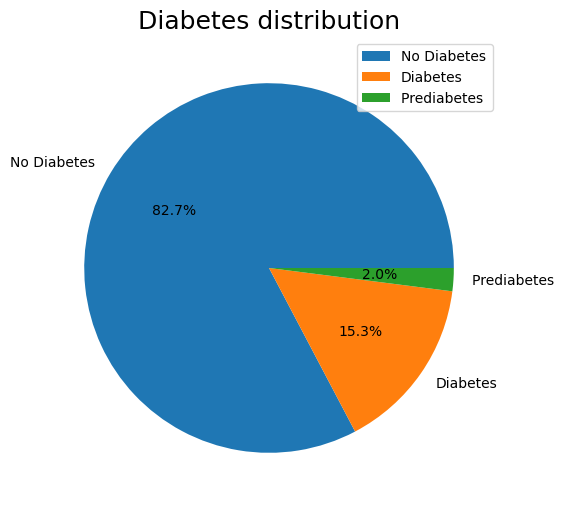

In [95]:
plt.figure(figsize=(20,6))
labels = ["No Diabetes"  ,"Diabetes","Prediabetes " ]

plt.subplot(1,2,1)
plt.pie(df["Diabetes_012"].value_counts() ,labels=labels ,autopct="%1.1f%%" )
plt.legend(loc = 1)
plt.title("Diabetes distribution" ,fontsize = 18)

plt.show()

<Figure size 1200x600 with 0 Axes>

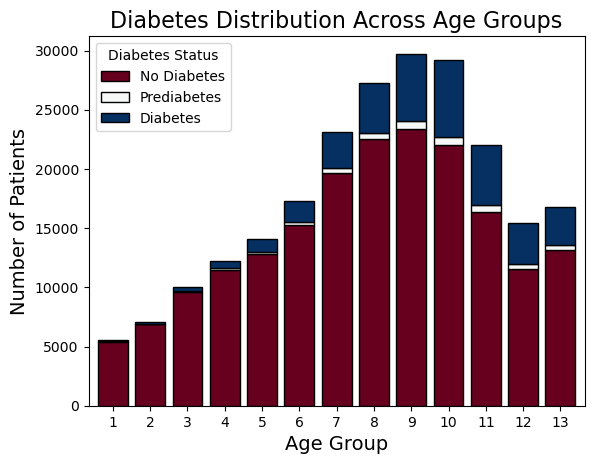

In [ ]:

plt.figure(figsize=(12, 6))

age_diabetes_counts = df.groupby("Age")["Diabetes_012"].value_counts().unstack()
age_diabetes_counts.plot(kind="bar", stacked=True, colormap='RdBu', edgecolor="black", width=0.8 )

plt.xlabel("Age Group", fontsize=14 )
plt.ylabel("Number of Patients", fontsize=14)
plt.title("Diabetes Distribution Across Age Groups", fontsize=16)
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Prediabetes", "Diabetes"])
plt.xticks(rotation=0)

plt.show()


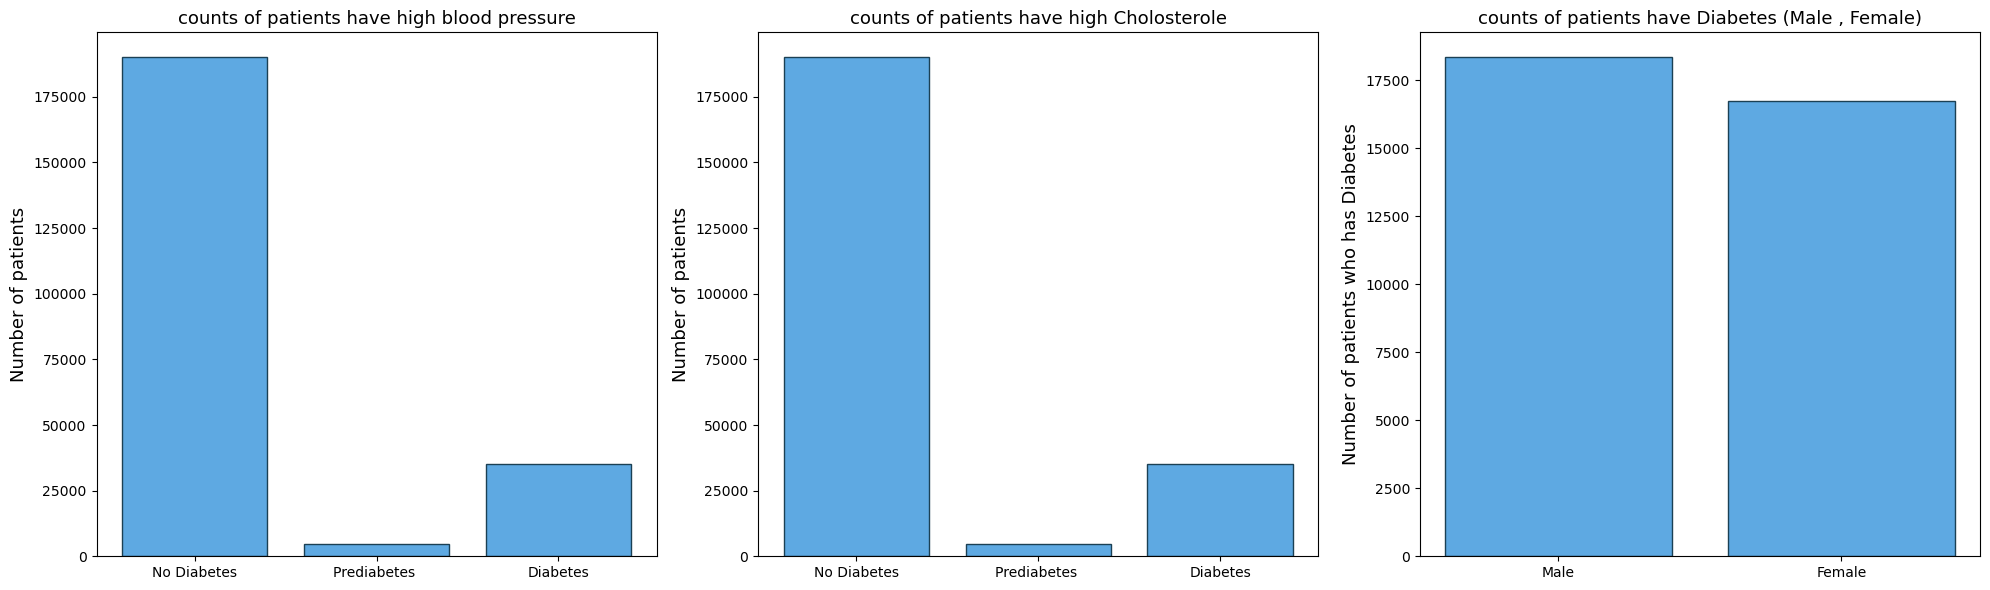

In [60]:
highBP_counts = df.groupby('Diabetes_012')['HighBP'].count()
highchol_counts = df.groupby('Diabetes_012')['HighChol'].count()
Gender_counts = df.groupby("Diabetes_012")['Sex'].value_counts()
labels = ["No Diabetes"  ,"Prediabetes ","Diabetes" ]

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(labels ,highBP_counts.values,color="#5ea9e2", edgecolor="#1b4054" )
plt.ylabel("Number of patients" , fontsize = 13)
plt.title("counts of patients have high blood pressure", fontsize = 13)\

plt.subplot(1,3,2)
plt.bar(labels ,highchol_counts.values,color="#5ea9e2", edgecolor="#1b4054" )
plt.ylabel("Number of patients" , fontsize = 13)
plt.title("counts of patients have high Cholosterole", fontsize = 13)

plt.subplot(1,3,3)
plt.bar(["Male" , "Female"],Gender_counts[2].values, color ='#5ea9e2' ,edgecolor="#1b4054")
plt.ylabel("Number of patients who has Diabetes" , fontsize = 13)
plt.title("counts of patients have Diabetes (Male , Female)", fontsize = 13)
plt.tight_layout()
plt.show()

### Detect Outliers

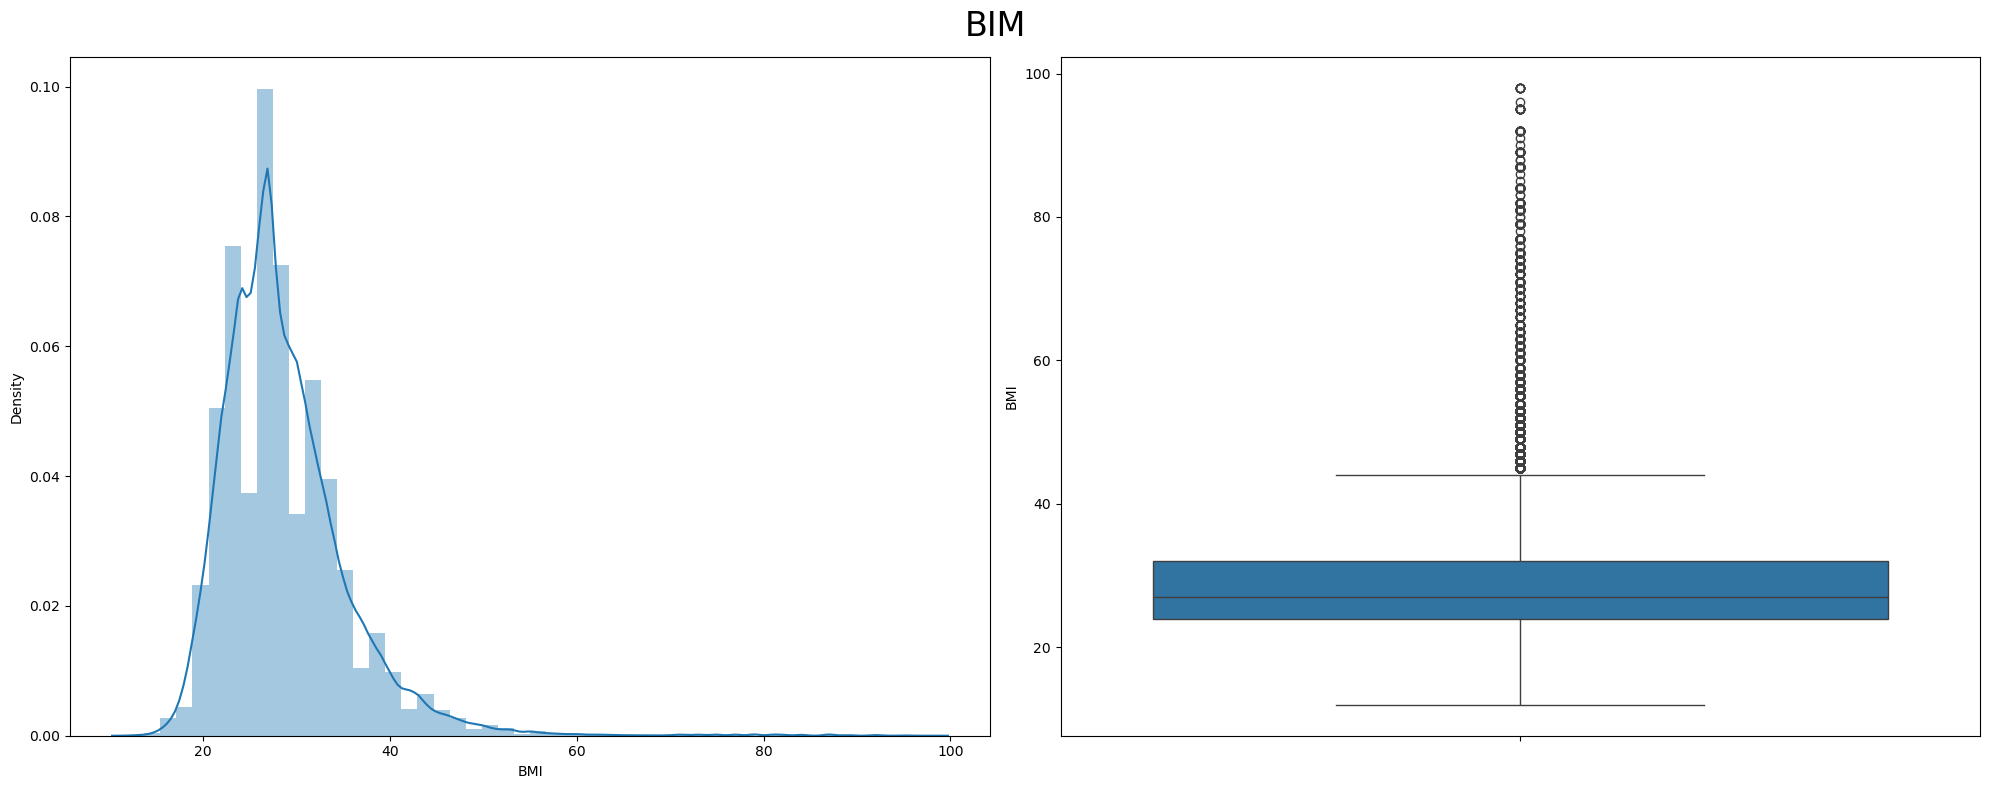

In [81]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.distplot(df['BMI'] )
plt.subplot(1,2,2)
sns.boxplot(df['BMI'] )

plt.suptitle('BIM', fontsize = 24)
plt.tight_layout()
plt.show()